<a href="https://colab.research.google.com/github/amzad-786githumb/Data-Analysis-using-Pyspark/blob/main/Data_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Let's mount the Google Drive</h2>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Task 1</h1>
<p> Insatalling pyspark</p>

In [47]:
!pip install pyspark


<p> Importing the modules</p>

In [48]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, max, desc, col, struct, countDistinct
import matplotlib.pyplot as plt

<p>Creating spark session</p>

In [49]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

<h1> Task 2</h2>

<p>Importing the dataset file</p>

In [50]:
listening_csv_path = '/content/drive/MyDrive/Copy of dataset/listenings.csv'

In [51]:
listeninng_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

<p>Check the data</p>

In [52]:
listeninng_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

<p>Dropping the useless columns<p>

In [53]:
listeninng_df = listeninng_df.drop('date')

<p>Dropping the null rows</p>

In [54]:
listeninng_df = listeninng_df.na.drop()

<p>Pronting the cleaned dataset<p>

In [55]:
listeninng_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

<p> Let's see the schema <p>

In [56]:
listeninng_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



<p>Let's see the shape of the dataframe<p>

In [57]:
shape = (listeninng_df.count(), len(listeninng_df.columns))
print(shape)

(13758905, 4)


<h1>Task 3</h1>

<h2>Basic Queries</h2>

<h3><b>Query: 1</b> Retrieve all records</h3>

In [58]:
listeninng_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

<h3><b>Query: 2</b> Count total listening entries</h3>

In [59]:
listeninng_df.count()

13758905

<h3><b>Query: 3</b> - List distinct artists in the dataset</h3>

In [60]:
q3 = listeninng_df.select('artist').distinct()
q3.show()

+--------------------+
|              artist|
+--------------------+
|        This Is Hell|
|          Chromatics|
|          Snoop Dogg|
|              Grimes|
|               Rufio|
|         Silverstein|
|      The Black Keys|
| You'll Be a Woma...|
|            Doctor P|
|           Kate Nash|
|       Black Feather|
|          Emre Aydın|
|              Easter|
|               Tyler|
|    Jane's Addiction|
|           Xperience|
|       Cockney Rebel|
|             Gemengd|
|         The Stereos|
|The Partridge Family|
+--------------------+
only showing top 20 rows



<h3><b>Query: 4</b> Select two columns: track and artist</h3>

In [61]:
q4 = listeninng_df.select('artist','track')
q4.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



<h2>Filtering & Aggregation Queries</h2>

<h3><b>Query: 1</b> Find all the records who have listen to Rihanna</h3>

In [62]:
q1 = listeninng_df.select('*').filter(listeninng_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

<h3><b>Query: 2</b> Get the count of tracks per artist</h3>

In [63]:
q2 = listeninng_df.groupby('artist').count()
q2.show()

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|        This Is Hell|  189|
|          Chromatics| 2190|
|          Snoop Dogg| 4234|
|              Grimes|20995|
|               Rufio|  421|
|         Silverstein| 2354|
|      The Black Keys|18800|
| You'll Be a Woma...|  388|
|            Doctor P|  467|
|           Kate Nash| 6549|
|       Black Feather|    8|
|          Emre Aydın|    6|
|              Easter|   37|
|               Tyler| 4781|
|    Jane's Addiction| 1671|
|           Xperience|    3|
|       Cockney Rebel|   47|
|             Gemengd|    2|
|         The Stereos|    2|
|The Partridge Family|   38|
+--------------------+-----+
only showing top 20 rows



<h3><b>Query: 3</b> Find top 10 user who are fan of Rihanna</h3>

In [64]:
q3 = listeninng_df.select('user_id').filter(listeninng_df.artist == 'Rihanna').groupby('user_id').count().sort(desc('count')).limit(10)
q3.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



<h3><b>Query: 4</b> Find top 10 famous track</h3>

In [65]:
q4 = listeninng_df.select('artist','track').groupby('artist','track').count().sort(desc('count')).limit(10)
q4.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



<h3><b>Query: 5</b> Find top 10 famous tracks of Rihanna</h3>

In [66]:
q5 = listeninng_df.select('artist','track').filter(listeninng_df.artist == 'Rihanna').groupby('artist','track').count().sort(desc('count')).limit(10)
q5.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



<h3><b>Query: 6</b> Find top 10 famous albums</h3>

In [67]:
q6 = listeninng_df.select('artist','album').groupby('artist','album').count().sort(desc('count')).limit(10)
q6.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



<h3><b>Query: 7</b> Top 10 most listened artists</h3>

In [68]:
q7 = listeninng_df.select('artist').groupby('artist').count().sort(desc('count')).limit(10)
q7.show()

+--------------+-----+
|        artist|count|
+--------------+-----+
|   David Bowie|64056|
|    Kanye West|55423|
|Arctic Monkeys|52428|
|   The Beatles|52420|
|     Radiohead|47309|
|          Muse|43664|
|     Lady Gaga|41651|
|       Rihanna|41594|
|      Coldplay|36681|
|  Taylor Swift|36527|
+--------------+-----+



<h2>Advanced Queries</h2>

<h3><b>Query: 1</b> Find users who listened to more than 100 tracks</h3>

In [69]:
q1 = listeninng_df.groupby('user_id').count().filter(col('count') > 100).sort(desc('count'))
q1.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|         15step|  800|
|10bobrevolution|  792|
|        14M5K0T|  404|
|  BandontheWall|  404|
|    Kizztronice|  403|
| BigManRestless|  402|
|   Black__Fairy|  402|
|CrossProjection|  402|
|    Desecration|  402|
|         caz119|  402|
|  carleesayshai|  402|
|       FinalTom|  402|
|           Faea|  402|
|    FILdaslemon|  402|
|      El_Mantis|  402|
|      Flayer723|  402|
|        jam-r0x|  402|
|  incultojurgis|  402|
|    mudvayne280|  402|
|         luke39|  402|
+---------------+-----+
only showing top 20 rows



<h3><b>Query: 2</b> Identify albums with the highest number of distinct tracks</h3>

In [70]:
q2 = listeninng_df.groupby('album').agg(count('track').alias('distinct_tracks')).sort(desc('distinct_tracks'))
q2.show()

+--------------------+---------------+
|               album|distinct_tracks|
+--------------------+---------------+
|       Greatest Hits|          67892|
|   The Life Of Pablo|          22311|
|                  AM|          14264|
|                  xx|          14198|
|     An Awesome Wave|          13673|
|        Sigh No More|          13556|
|Whatever People S...|          12731|
|            For Emma|          11995|
|          Art Angels|          11694|
|                  21|          11576|
|               Lungs|          11374|
|         Born to Die|           9999|
|         The Best Of|           9910|
|         The Suburbs|           9862|
|            Bon Iver|           9684|
|    Purpose (Deluxe)|           9668|
|    Only Revolutions|           9429|
| To Pimp a Butterfly|           8886|
|               RIOT!|           8808|
|       Teenage Dream|           8755|
+--------------------+---------------+
only showing top 20 rows



<h3><b>Query: 3</b> Find the top 5 most listened tracks across all users</h3>

In [71]:
q3 = listeninng_df.groupby('track').count().sort(desc('count')).limit(5)
q3.show()

+-------+-----+
|  track|count|
+-------+-----+
|  Intro|13176|
|   Home| 7576|
|  Hello| 6961|
|Hold On| 5857|
|   Work| 4889|
+-------+-----+



<h3><b>Query: 4</b> Find all tracks containing a keyword (e.g., "love")</h3>

In [72]:
q4 = listeninng_df.select('*').filter(listeninng_df.track.contains('love'))
q4.show()

+-----------+--------------------+------------------+--------------------+
|    user_id|               track|            artist|               album|
+-----------+--------------------+------------------+--------------------+
|00williamsj|     John My Beloved|    Sufjan Stevens|     Carrie & Lowell|
|  03swalker|Round And Round (...|     Tinkara Kovač|Eurovision Song C...|
|  03swalker|Round And Round (...|     Tinkara Kovač|Eurovision Song C...|
|  03swalker|Round And Round (...|     Tinkara Kovač|Eurovision Song C...|
|  03swalker|Round And Round (...|     Tinkara Kovač|Eurovision Song C...|
|  03swalker|Round And Round (...|     Tinkara Kovač|Eurovision Song C...|
|    0bvious|All is full of lo...|             Björk|              Random|
|  1000julys|   This kind of love|      Sister Hazel|          Absolutely|
|  1000julys|   This kind of love|      Sister Hazel|Before The Amplif...|
|  1000julys|   This kind of love|      Sister Hazel|Before The Amplif...|
|        117|            

<h3><b>Query: 5</b> - Retrieve listening history for a specific user(03swalker)
</h3>

In [73]:
q5 = listeninng_df.select('*').filter(listeninng_df.user_id == '03swalker')
q5.show()

+---------+--------------------+-------------+------------------+
|  user_id|               track|       artist|             album|
+---------+--------------------+-------------+------------------+
|03swalker|I May Fall (feat ...|Jeff Williams|              RWBY|
|03swalker|I Burn (feat Case...|Jeff Williams|              RWBY|
|03swalker|Gold (feat Casey ...|Jeff Williams|              RWBY|
|03swalker|I Burn (Yellow Tr...|Jeff Williams|              RWBY|
|03swalker|From Shadows (Bla...|Jeff Williams|              RWBY|
|03swalker|Mirror Mirror (Wh...|Jeff Williams|              RWBY|
|03swalker|Red Like Roses (R...|Jeff Williams|              RWBY|
|03swalker|This Will Be the ...|Jeff Williams|              RWBY|
|03swalker|       Sun Goes Down| David Jordan|      Set The Mood|
|03swalker|             All Day|    Girl Talk|           All Day|
|03swalker|             Bad Boy|      Cascada|Everytime We Touch|
|03swalker|  Truly Madly Deeply|      Cascada|Everytime We Touch|
|03swalker

<h3><b>Query: 6</b> Get all artists starting with a specific letter (e.g., 'A')</h3>

In [74]:
q6 = listeninng_df.select('*').filter(listeninng_df.artist.startswith('A'))
q6.show()

+-----------+--------------------+--------------------+--------------------+
|    user_id|               track|              artist|               album|
+-----------+--------------------+--------------------+--------------------+
|000Silenced|Fenix Funk 5 (Wip...|          Aphex Twin|       Wipeout Pulse|
|000Silenced|         B+W Stripes|          Aphex Twin|Selected Ambient ...|
|000Silenced|Fenix Funk 5 (Wip...|          Aphex Twin|       Wipeout Pulse|
|000Silenced|Fenix Funk 5 (Wip...|          Aphex Twin|       Wipeout Pulse|
|000Silenced|Take Me Away (Org...|Agent X Feat Nate...|Addicted to Bass ...|
|000Silenced|Only Man (Jakwob ...|        Audio Bullys|Addicted to Bass ...|
|000Silenced|Shut The Lights O...|              Adam F|Addicted to Bass ...|
|000Silenced|      Homesick Angel|           Atari Era|Addicted to Bass ...|
|      _0015|I Couldn’t Say It...|      Arthur Russell|Love Is Overtakin...|
|      _0015|    F**kin' Problems|          A$AP Rocky|        LongLiveA$AP|

<h3><b>Query: 7</b> - Find users who listened to more than one track by the same artist</h3>

In [75]:
q7 = listeninng_df.groupBy('user_id', 'artist').count().filter(col('count') > 1).select('user_id', 'artist')
q7.show()

+---------------+--------------------+
|        user_id|              artist|
+---------------+--------------------+
|    000Silenced|        Dom & Roland|
|      05thouldm|                Akon|
|        0bvious|             Actress|
|         0m3rt4|   Zardonic & Krusha|
|   101niknak101|          Lily Frost|
|10bobrevolution|     Clyde McPhatter|
|    12thmarquis|         BBC Radio 4|
|      1337Chris|        Foo Fighters|
|           1dan|       Happy Mondays|
|   1davey_darko|      Morphine Ghost|
|        1Marley|      Juanita Dailey|
|         1Spork|           Blackmill|
|            2HB|                 M83|
|           2key|    Boards of Canada|
|   2plus2isfive|          Ryan Adams|
|           3DiT|                3dit|
|          3mkay|             The The|
|       456chris|   Rodney Carrington|
|       456chris|  The Joy Formidable|
|            462|Silent Witness & ...|
+---------------+--------------------+
only showing top 20 rows



<h3><b>Query: 8</b> - Identify tracks listened to by multiple users
</h3>

In [76]:
q8 = listeninng_df.groupBy('track').count().filter(col('count') > 1).select('track')
q8.show()

+--------------------+
|               track|
+--------------------+
|       Smart Systems|
|              V 3005|
|  Beer For Breakfast|
|            Has Been|
|The Devil Named M...|
|             Amazing|
|            Bus Talk|
|            Superfly|
|       The Beginning|
|            One Half|
|      January Friend|
|           On My Way|
|             Banquet|
| Gold on the Ceiling|
|Hybrid (Biome Remix)|
|              Flower|
|     Burning Bridges|
|     Serving The One|
|         Koonyum Sun|
|      Mambo De Paree|
+--------------------+
only showing top 20 rows



<h3><b>Query: 9</b> Retrieve user history where track or artist names are missing</h3>

In [77]:
q9 = listeninng_df.filter(listeninng_df.track.isNull() | listeninng_df.artist.isNull())
q9.show()

+-------+-----+------+-----+
|user_id|track|artist|album|
+-------+-----+------+-----+
+-------+-----+------+-----+



<h3><b>Query: 10</b> Find songs that appear in more than X different album</h3>

In [78]:
q10 = listeninng_df.groupBy('track').agg(countDistinct('album').alias('distinct_albums')).filter(col('distinct_albums') > 1).select('track')
q10.show()

+--------------------+
|               track|
+--------------------+
|      January Friend|
|Hybrid (Biome Remix)|
|              Remedy|
|      Worry About Me|
|       The Beginning|
|  The Gondoliers (or|
|            The Moth|
|            The City|
|    Straight to Hell|
|King Tubby Meets ...|
|           On My Way|
|Turn Your Lights ...|
|These Things I've...|
|             Amazing|
|               Do It|
|Love I've Found i...|
|You Ain't Seen No...|
|              SWLABR|
|          Nightmares|
|   Things Mean a Lot|
+--------------------+
only showing top 20 rows



<h2>Combining Multiple Conditions</h2>

<h3><b>Query: 1</b> Filter songs by both artist as "Cascada"  and album name as "Everytime We Touch"</h3>

In [79]:
q1 = listeninng_df.filter((listeninng_df.artist == "Cascada") & (listeninng_df.album == "Everytime We Touch"))
q1.show()


+--------------+--------------------+-------+------------------+
|       user_id|               track| artist|             album|
+--------------+--------------------+-------+------------------+
|     03swalker|             Bad Boy|Cascada|Everytime We Touch|
|     03swalker|  Truly Madly Deeply|Cascada|Everytime We Touch|
|     03swalker|  Everytime We Touch|Cascada|Everytime We Touch|
|     03swalker|  Everytime We Touch|Cascada|Everytime We Touch|
|     AbigailEM|Everytime We Touc...|Cascada|Everytime We Touch|
|  AceOfTheDeck|             Bad Boy|Cascada|Everytime We Touch|
|AdvocateKartel|Everytime We touc...|Cascada|Everytime We Touch|
| AlestesCarrow|Everytime We Touc...|Cascada|Everytime We Touch|
|      Alexrrrr|  Everytime We Touch|Cascada|Everytime We Touch|
|      Alexrrrr|  Everytime We Touch|Cascada|Everytime We Touch|
|    allithebug|Everytime We Touc...|Cascada|Everytime We Touch|
|    allithebug|Everytime We Touc...|Cascada|Everytime We Touch|
|       allymad|A Never E

<h3><b>Query: 2</b> Find tracks listened to by a specific user and belonging to a given artist</h3>

In [80]:
q2 = listeninng_df.filter((listeninng_df.user_id == "3DiT") & (listeninng_df.artist == "3dit"))
q2.show()

+-------+----------------+------+-------------------+
|user_id|           track|artist|              album|
+-------+----------------+------+-------------------+
|   3DiT|       Loud Saga|  3dit|Super Cork & Beyond|
|   3DiT|      Super Cork|  3dit|Super Cork & Beyond|
|   3DiT|    All For Cork|  3dit|     Random OutPlay|
|   3DiT|  Bang Your Face|  3dit|     Random OutPlay|
|   3DiT|  Bang Your Face|  3dit|     Random OutPlay|
|   3DiT|    All For Cork|  3dit|     Random OutPlay|
|   3DiT|    All For Cork|  3dit|     Random OutPlay|
|   3DiT|    All For Cork|  3dit|     Random OutPlay|
|   3DiT|   Sratch & Flex|  3dit|     Random OutPlay|
|   3DiT|PoichBoichToich1|  3dit|    PoichBoichToich|
+-------+----------------+------+-------------------+



<h3><b>Query: 3</b> Exclude entries for Justin Bieber</h3>

In [81]:
q3 = listeninng_df.filter(listeninng_df.artist != "Justin Bieber")
q3.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

<h3><b>Query 4</b> - Retrieve records where artist is "Robyn" or track names contain certain keywords as "Be Mine!"</h2>


In [82]:
q4 = listeninng_df.filter((listeninng_df.artist == "Robyn") | (listeninng_df.track.contains("Be Mine!")))
q4.show()

+-----------+--------------------+------+--------------------+
|    user_id|               track|artist|               album|
+-----------+--------------------+------+--------------------+
|000Silenced|Be Mine! (Ballad ...| Robyn|            Be Mine!|
|  1337atron|Cry When You Get ...| Robyn|      Body Talk Pt 1|
|  1337atron|Cry When You Get ...| Robyn|      Body Talk Pt 1|
|  1337atron|Cry When You Get ...| Robyn|      Body Talk Pt 1|
|  1337atron|Cry When You Get ...| Robyn|      Body Talk Pt 1|
|  1337atron|        Hang with Me| Robyn|           Body Talk|
|  1337atron|        Hang with Me| Robyn|           Body Talk|
|  1337atron|      Indestructible| Robyn|           Body Talk|
|  1337atron|              Fembot| Robyn|           Body Talk|
|  1337atron|            Robotboy| Robyn|Robyn (Special Ed...|
|  1337atron|   Dancing on My Own| Robyn|           Body Talk|
|  1337atron|Bionic Woman (Int...| Robyn|Robyn (Special Ed...|
|  1337atron| Crash and Burn Girl| Robyn|Robyn (Special

<h1>Task 4</h1>

Importing the genre.csv file

In [83]:
genre_csv_path = '/content/drive/MyDrive/Copy of dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

Let's check the data

In [84]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [85]:
listeninng_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

<h3><b>Query: 1</b> Inner join the two dataset</h3>

In [86]:
data = listeninng_df.join(genre_df, how='inner', on='artist')
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

<h3><b>Query: 2</b> Find top 10 users are are a fan of POP music</h3>

In [87]:
q2 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').count().sort(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



<h3><b>Query: 3</b> Find top 10 famous genres</h3>

In [87]:
q7 = data.select('genre').groupby('genre').count().sort(desc('count')).limit(10)
q7.show()

<h1>Task 5</h5>

<h3><b>Query: 1</b> Find out each user favourite genre</h3>

In [88]:
q11 = data.select('user_id','genre').groupby('user_id','genre').count().sort(desc('count')).dropDuplicates(['user_id'])
q11.show()

+---------------+-----------+-----+
|        user_id|      genre|count|
+---------------+-----------+-----+
|      --Shinn--|       rock|  112|
|       --ollz--|       rock|   47|
|     -Amnesiac-|      metal|  323|
|         -Bish-|       rock|   59|
|        -Danni-|       rock|   45|
|          -DeWp|    hip hop|   82|
|      -Faction-|       rock|   56|
|-February-Star-|       rock|   74|
|        -Gemma-|british pop|   38|
|   -Gingergirl-|        pop|   28|
|        -Hazel-|   synthpop|   14|
|        -Heiko-| electronic|   43|
|         -Katie|      lo-fi|   58|
|      -Krystal-|       rock|   87|
|         -Mark-| indie rock|   37|
|       -Mullet-|  metalcore|   60|
|          -Robs|       rock|   38|
| -SleepingStar-|black metal|   57|
|      -Stifler-|       rock|  144|
|  -Toxic-Waste-|  aggrotech|   55|
+---------------+-----------+-----+
only showing top 20 rows



<h3><b>Query: 2</b> Find out how many pop, rock, metal and hiphop singers we have and plot the visualization using the chart</h3>

In [89]:
q22 = data.select('genre').filter((data.genre == 'pop') | (data.genre == 'rock') | (data.genre == 'metal') | (data.genre == 'hiphop')).groupby('genre').count()
q22.show()

+-----+-------+
|genre|  count|
+-----+-------+
|  pop|1544747|
|metal| 208107|
| rock|2691934|
+-----+-------+



In [91]:
#Now lets visaulize the data

In [93]:
q22_list = q22.collect()

In [96]:
labels  = [row['genre'] for row in q22_list]
counts = [row['count'] for row in q22_list]

In [97]:
print(labels)
print(counts)

['pop', 'metal', 'rock']
[1544747, 208107, 2691934]


Visualize this data usning matplotlib library

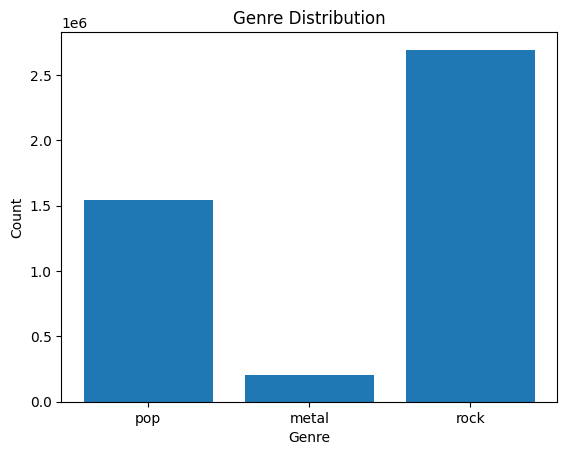

In [100]:
plt.bar(labels, counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()